# Easy data processing
Using the `Experiment` and `DataRun` class to generalize processing data. General usage:

1. Create an `Experiment`
2. Use the `structured_data` method to extract the parameter of interest
3. Plot

In [3]:
import sys
sys.path.append("../")
import datarun
from matplotlib import pyplot as plt
import numpy as np
import os
from scipy.optimize import curve_fit

In [4]:
#If you make a change to datarun.py, run this cell or restart your kernel
import importlib
importlib.reload(datarun)

<module 'datarun' from '/home/ben/Documents/Repos/MOTsArentForKids/MOT_loading_time/../datarun.py'>

In [7]:
d = datarun.Experiment(
    vstart = 6,
    vend = 15,
    vstep = 1, 
    idx_start = 168,
    datapath = "../data/mar07/mar07/MOT_loading_time",
    numtrials = 10,
    mask = .15
)

|████████████████████████████████████████| 100/100 [100%] in 2:11.1 (0.76/s)    


In [49]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}

plt.rc('font', **font)

In [15]:
def loading_dyn(x,a,b):
    return a/b*(1-np.exp(-x*b))

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.


removed
removed


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.


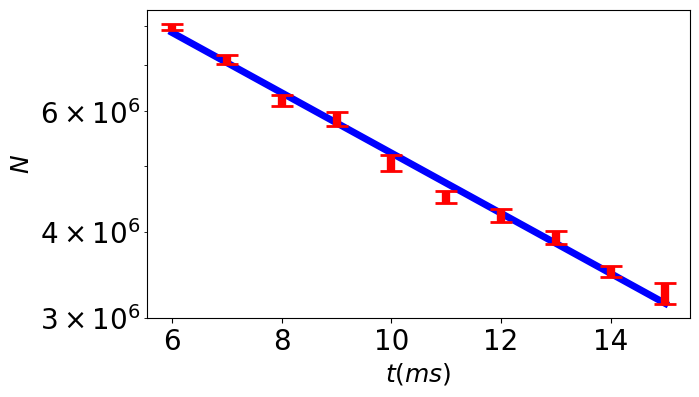

In [51]:
N_list = d.structure_data(lambda d: d.atom_number_px_sum())
yerr = [np.nanstd(arr) for arr in N_list.values()]/np.sqrt(10)
means = [np.mean(arr) for arr in N_list.values()]

for arr in N_list.values():
    mean = np.mean(arr)
    std = np.std(arr)

    for val in arr:
        if np.abs(val-mean) > 2*std:
            arr.remove(val)
            print("removed")

popt,pcov=curve_fit(loading_dyn, d.vlist, means, p0 = (1e8,1e-1), sigma=yerr, absolute_sigma=True)
ratio = popt[0]/popt[1]

xdata=np.linspace(min(d.vlist),max(d.vlist),1000)

plt.plot(xdata, ratio-loading_dyn(xdata,*popt),'-b', label = r"$a(1-e^{-bx})$", linewidth = 5)

plt.errorbar(d.vlist, ratio-np.array(means), yerr, linestyle = "None", color = "r", marker = ".", label = "expt.", elinewidth=6, capsize = 8, capthick = 2)
#for datum in d.data:
    #plt.scatter(datum.value, ratio-datum.atom_number_px_sum(), color = "k", marker = '.', linestyle = "None", alpha = .2)

plt.xlabel(r"$t (ms)$", fontsize=18)
plt.ylabel(r"$N$", fontsize = 18)
plt.yscale("log")
plt.gcf().set_size_inches([7,4])
plt.savefig("../figures/loading_time_1.png")

In [52]:
popt[1]

0.10108268541112062

## Plot fits

In [35]:
runs = d.structure_data()
runs

{2.5: <datarun.DataRun at 0x7f87ab9de1d0>,
 2.65: <datarun.DataRun at 0x7f87abb661d0>,
 2.8: <datarun.DataRun at 0x7f87abba8510>,
 2.95: <datarun.DataRun at 0x7f87aa7db610>,
 3.1: <datarun.DataRun at 0x7f87abc09850>}

In [31]:
popt

array([1.79856822e+04, 1.02021614e-01])

In [34]:
np.sqrt(pcov[0][0])

465.42944435559184

In [35]:
np.sqrt(pcov[1][1])

0.005574975118016282

In [38]:
popt[1]/popt[0]

6.977143223923842e-08

In [38]:
np.sqrt((pcov[1][1]/popt[0]**2)+(popt[1]**2/popt[0]**4*pcov[0][0]))

3.4296744603344166e-07